In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
import os
DATA_PATH = "Dane\Wlasne\stock_data_with_news_all.csv"

In [3]:
data = pd.read_csv(DATA_PATH, sep=",")

In [4]:
data.head()

,Date,Increased,News_no1,News_no2,News_no3,News_no4,News_no5,News_no6,News_no7,News_no8,...,News_no41,News_no42,News_no43,News_no44,News_no45,News_no46,News_no47,News_no48,News_no49,News_no50
0,2012-01-30,0,"Jessica Hoppe, Blogger Behind 'Having It All' ...",Indiana Welcomes Super Bowl Fans With Children...,Be Not Afraid: How Travel Disarms Media Hype,Water Parks In Miami: A Huffington Post Travel...,"10 Dips, Nibbles And Dishes For Game Day","Isabella Rossellini Models For Betsey Johnson,...",Small Town Life In The Peruvian Andes,Self-Acceptance: Are You an 'Alchemist' or a '...,...,Craigslist Finds: 14 Completely Strange Sales ...,"Local Mom Gives A ""Hand Up"" To Single Mothers",Water Parks in Maryland: A Huffington Post Tra...,"Sofia Coppola's First Marni For H&M Ads, And O...",Water Parks In North Dakota: A Huffington Post...,The London Declaration: A Tipping Point For Th...,Can Conflict Actually Improve Relationships?,"Juliana Luna, Dancer: FaceTime, A Beauty Stree...","5 Serums We're Using To Fight Aging, Dryness, ...",Ikat-Inspired DIY Nail Art
1,2012-01-31,0,Miley Cyrus Mom Jeans Might Actually Be Kinda ...,"Marion Cotillard, Carey Mulligan & 'Vanity Fai...",12 Reasons To Avoid GMOs,King Karl,Healthy Mexican At Home: Frito Pie Makeover,US Panel Defends Call To Censor Bird Flu Studies,William & Kate's Patter of Little Feet: A Cock...,Military Families + Autism: A Recipe for Heart...,...,David Tutera Lawsuit: Couple Sues Celebrity We...,"GraphicImage Will Declutter Your Purse: iPad, ...",Love And Health: Research Examines Love's Impa...,Skiers vs. Snowboarders: Who Gets Injured More?,I Stole My Friend's Dress,The Wonder Of Tomato Paste In A Tube,New Cure for Chronic Disease Discovered,HIV Is 'Like Diabetes'? Let's Stop Kidding Our...,Getting to Know the Tiger Mom,Joan And Melissa Rivers On Ideal Shopping Budd...
2,2012-02-01,1,"Astrology Now: Relationships, Projects Coming ...","Man Drinks Green Cleaning Product, Survives (V...",A Very '80s Vintage Top: From Our Network,Technicolor Dream Coat: From Our Network,How To Wear Bright Stripes: From Our Network,Nagging: Is It Killing Your Marriage?,The World Is A Classroom,Best Children's Books For February,...,Lindsay Lohan Floral Pants Are A Bit Busy (PHO...,World's Most Popular Landmarks (PHOTOS),Round 3: Game Day Snacks Bracket Challenge,Gwyneth Paltrow Marriage: Actress Gives Relati...,New Adventures in Facial Hair,G-Star Jeans on Why Spokesmodel Clémence Poésy...,Divorce Over Infidelity? Not So Fast...,Joan And Melissa Rivers Talk About Motherhood ...,Conversion Disorder and Mass Hysteria,Should Grief Be Treated the Same as Depression?
3,2012-02-02,1,"Join Eckhart Tolle, Jim Carrey and John Raatz ...",Reflecting on the Wonder Years,Our Top 10 Favorite Super Bowl Food Commercials,"Emma Watson's Style Problem, Lana Del Ray's Vo...","We Mimic The Way Our Dining Companions Eat, St...",Gisele Super Bowl Email Requests Prayers & Pos...,Lana Del Rey Vogue UK Cover: Is The Indie Sing...,"Blake Lively Talks Not Having A Stylist, Wanti...",...,"Lauren Scruggs, Model Who Walked Into Plane Pr...",Crystal Renn Reveals The Truth About Her Recen...,Olivia Wilde: Divorce Made Me Feel Like A 'Fai...,Love In Marriage: Long-Term Love May Not Be Un...,Baby Plays Ping-Pong Better Than You (VIDEO),Post-Exercise Massages Work: New Research Prov...,Homes Of The Heartbroken: Divorced Celebs' Houses,"Facebook May Be Used Against You In Court, Law...",Great Things Happen When We Work Together,Jason Wu's Cat Has Us Dreaming Of Kitty Coutur...
4,2012-02-03,1,"One, Two, Three",How to Begin to Achieve Your Dreams Right Now,How To Break Free From The Addictive Fix,Why I'm A Cross-Dresser...For Men's Accessories,Can Exercise Be Addicting?,The Culture of Wellbeing: Jill Miller and the ...,How To Be Organized: Super Bowl Food Stain Rem...,High-Fructose Corn Syrup May Be Worse for You ...,...,How Much Are the Fines for a Book 31 Years Late?,"New Year, New Bride: How to Slim Down for Your...",The Death and 

# Dzielenie na train/test

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop(['Date', 'Increased'], axis=1), data['Increased'], test_size=0.20, random_state=42)

In [6]:
X_train.shape

(1272, 50)

In [7]:
X_test.shape

(318, 50)

In [8]:
y_train.shape

(1272,)

In [9]:
X_train.head()

,News_no1,News_no2,News_no3,News_no4,News_no5,News_no6,News_no7,News_no8,News_no9,News_no10,...,News_no41,News_no42,News_no43,News_no44,News_no45,News_no46,News_no47,News_no48,News_no49,News_no50
1174,1 In 5 U.S. Households With Kids Don't Have En...,"Donald Trump, We Need To Talk About What A Pol...",Wednesday's Morning Email: Early Polls Give Cl...,"Snapchat Fans, Rejoice: Ballot Selfies Are Tot...",Clinton-Supporting Super PACs Target Latino Vo...,Donald Trump Rallies Troops: 'We're Gonna Get ...,Charlotte Protesters Demand Mayor's Resignatio...,Emily Blunt Doesn’t Care If Her 'Girl On The T...,Indiana Officials Attack Voter Registration Dr...,"Inside The Landmark, Long Overdue Study On Che...",...,Jesse Williams Has A Message For Americans Who...,Photos From The Townville Elementary Shooting ...,Alabama Chief Justice Stands Trial For Blockin...,California Men Charged In Suspected Murder Amo...,The Surprising Truth About What's REALLY In Co...,Police Fatally Shoot Black Man In San Diego Su...,Ice-T Reveals What It Was Like To Have Vice Pr...,18 Latinos Share Their Honest Thoughts About H...,Hillary Clinton Blasts North Carolina's 'Mean-...,#TrumpAFact Turns Twitter Into A World Where E...
701,The Importance of Multidisciplinary Eating Dis...,What Veterans Have Taught Me About Teaching,"Yes, Anyone Can Wear Red Lipstick",Why Every College Student Should Work on a Pol...,"McDonald's Drops Rights to ""You Deserve a Break""",10 Strategies For Boosting Your Efficiency And...,Pizza Hut's New Menu Makes Us Cringe,Cops Unveil New Tool In The Fight To Stop Scho...,11 University Towns That Double As Amazing Ret...,The 8 Main Concerns Shared By Older Women,...,What Explains the Election Results? It's (Stil...,A League of His Own: How Lewis Howes Went From...,"If Put In Other Industries, Many Hollywood Exe...",Are We Really the Smartest Creatures on Earth?,What a Fisherman Can Teach the Alpha Male and ...,Vitamin D vs. Common Cold: And the Winner Is...,The Spookie Mind,It Isn't the Athletes; It's the Educators,The Most Important Symbol for Investors Is 'DOL',Stephen Glass Breaks His Silence
1479,Mom Celebrates Her Stretch Marks With Post-Bab...,Right-Wing Conspiracy Theory About Alabama Ele...,Millennials Are Drowning And They Need A New S...,Holiday Beauty Looks For Every Party On Your C...,Christmas Comes Early To Dixie,"To Improve Human Rights In North Korea, Engage...",Australia’s Music Industry Fights Sex Abuse Wi...,Suicide Bomber Disguised As Cop Attacks Police...,Time Is Running Out For Syria's Besieged Commu...,The Actual Rohingya Death Toll Is 22 Times Hig...,...,El Salvador Upholds Three-Decade Prison Term F...,U.S.-Saudi Nuclear Talks: A Barometer For Whit...,Daisy Ridley And John Boyega Explain How 'Star...,"Repackaging Abolition: Targeting Christians, C...",What's Inside The GOP's Christmas Box?,The Biggest Lessons For Democrats From The Ala...,Tom Hanks And Stephen Colbert Are Ready To Fig...,Rep. Farenthold's Former Aide Describes Abusiv...,LGBTQ Alabamians Played A Crucial Role In Spur...,Marco Rubio Holding Out For Child Tax Credit T...
528,9 Disgusting Things You Didn't Know You've Bee...,My 40-Something Self,Paralympic Snowboarder Amy Purdy On Overcoming...,Innovative Cardio Workouts,The Therapeutic Value Of An F-Bomb,A Digital Detox Can Change Your Life. Here's W...,Non-Melanoma Skin Cancer Raises Risk Of Develo...,4 Habits for a Healthy Weight,The Weekly Menu Board: Why Every Family Kitche...,Using Airplane Wi-Fi? Watch Out For The Guy In...,...,10 Glorious Places Where Daylight Savings Time...,"New Therapy Could Simplify Treatment, Improve ...",The Stars Who Landed On This Week's Worst-Dres...,My Husband Got a Standing Ovation at Starbucks,Cressida Bonas' Red Carpet Style Includes Snea...,Sardinian Honey and Cheese Pastries (Seadas),Ziplining and Facing My Fears to Step Into My ...,Moms Gone Wild: When You Feel Out of Control,Raymond Bickson of Hawaii: How to Be A Hospita...,Visiting the Driest Place on Earth
987

# Przetwarzanie newsów (Count Vectorizer)

In [10]:
trainheadlines = []
for row in range(0,len(X_train.index)):
    trainheadlines.append(' '.join(str(x) for x in X_train.iloc[row]))

In [11]:
trainheadlines[0]

"1 In 5 U.S. Households With Kids Don't Have Enough To Eat: Report Donald Trump, We Need To Talk About What A Poll Is Wednesday's Morning Email: Early Polls Give Clinton Debate Bump Snapchat Fans, Rejoice: Ballot Selfies Are Totally Constitutional In New Hampshire Clinton-Supporting Super PACs Target Latino Voters Donald Trump Rallies Troops: 'We're Gonna Get Rid Of That Crooked Woman' Charlotte Protesters Demand Mayor's Resignation Over Keith Scott's Slaying Emily Blunt Doesn’t Care If Her 'Girl On The Train' Character Isn’t 'Likable' Indiana Officials Attack Voter Registration Drive After Finding 10 Bad Forms Inside The Landmark, Long Overdue Study On Chest Binding Obama Says He Wouldn't Want His Daughters Listening To Trump HUFFPOST HILL - Wow, It Seems Like Obama's First Veto Override Was Only Yesterday Danny Meyer Steps Up And Gives His Workers Paid Parental Leave Humanizing Portraits Give Detained Immigrants The Dignity They Deserve House Sets Up Vote On Flint Funding In Bid To A

Usuwamy słowa najczęściej występujące a nic nieznaczące

Tura pierwsza (słowa często występujące lecz nie mające żandego realnego znaczenia)

In [12]:
useless_words = [
    ' to ', 
    ' you ', 
    ' the ', 
    ' and ', 
    ' are ', 
    ' is ', 
    ' what ', 
    ' we ', 
    ' where ', 
    ' when ', 
    ' from ', 
    ' at ', 
    ' a ', 
    ' or ', 
    ' for ',
    ' i ',
    ' an '
    # possibly important
#     ' in ',
#     ' of ',
#     ' on ',
#     ' with ',
#     ' his ',
#     ' it '
]

Druga tura oczyszczania nieznaczących słów (apostrofy)

In [13]:
useless_words_p2 = [
    "'s ",
    "'t ",
    "'re "
]

Trzecia tura oczyszczania nieznaczących słów (znaki specjalne)

In [14]:
useless_words_p3 = [
    ':',
    "'",
    ',',
    "(",
    ")",
    '!',
    '?',
    '.',
    '`',
    '‘',
    '’'
]

Czwarta tura oczyszczania nieznaczących słów (cyfry)

In [15]:
useless_words_p4 = [
    '1',
    '2',
    '3',
    '4',
    '5',
    '6',
    '7',
    '8',
    '9',
    '0'
]

Piąta tura (dni tygodnia)?

In [16]:
useless_words_p5 = [
    ' monday ',
    ' tuesday ',
    ' wednesday ',
    ' thursday ',
    ' friday ',
    ' saturday ',
    ' sunday '
]

Szósta tura (nazwy miesięcy)

In [17]:
useless_words_p6 = [
    ' january ',
    ' february ',
    ' march ',
    ' april ',
    ' may ',
    ' june ',
    ' july ',
    ' august ',
    ' september ',
    ' october ',
    ' november ', 
    ' december '
]

Najpierw jednak znormalizujmy tekst do malych liter

In [18]:
trainheadlines = [hdline.lower() for hdline in trainheadlines]

In [19]:
trainheadlines[3]

'9 disgusting things you didn\'t know you\'ve been eating your whole life my 40-something self paralympic snowboarder amy purdy on overcoming obstacles and her medal-worthy breakfast innovative cardio workouts the therapeutic value of an f-bomb a digital detox can change your life. here\'s what to know before you do it. non-melanoma skin cancer raises risk of developing other cancers, study finds 4 habits for a healthy weight the weekly menu board: why every family kitchen needs one using airplane wi-fi? watch out for the guy in 27a \'sesame street\' parodies \'les misérables\' by subtracting revolution and adding cookies culinary do\'s & don\'ts from "the worst cook in america" the italian guide to flawless style the moscow mule sucks: 15 bartenders name their most overrated and underrated cocktails create and style: new toys allow kids to customize the fun \'hot facebook mom\' still wants to know: \'what\'s your excuse?\' when we allow their light to shine, a movement is created pack

Teraz usunmy slowa

**TURA 1**

In [20]:
for to_remove in useless_words:
    trainheadlines = [hdline.replace(to_remove, ' ') for hdline in trainheadlines]

In [21]:
trainheadlines[3]

'9 disgusting things didn\'t know you\'ve been eating your whole life my 40-something self paralympic snowboarder amy purdy on overcoming obstacles her medal-worthy breakfast innovative cardio workouts therapeutic value of f-bomb digital detox can change your life. here\'s know before do it. non-melanoma skin cancer raises risk of developing other cancers, study finds 4 habits healthy weight weekly menu board: why every family kitchen needs one using airplane wi-fi? watch out guy in 27a \'sesame street\' parodies \'les misérables\' by subtracting revolution adding cookies culinary do\'s & don\'ts "the worst cook in america" italian guide flawless style moscow mule sucks: 15 bartenders name their most overrated underrated cocktails create style: new toys allow kids customize fun \'hot facebook mom\' still wants know: \'what\'s your excuse?\' allow their light shine, movement created pack your chanel! karl lagerfeld designing hotel wanna drink like famous person this weekend? mix up some

**TURA 2**

In [22]:
for to_remove in useless_words_p2:
    trainheadlines = [hdline.replace(to_remove, ' ') for hdline in trainheadlines]

In [23]:
trainheadlines[3]

'9 disgusting things didn know you\'ve been eating your whole life my 40-something self paralympic snowboarder amy purdy on overcoming obstacles her medal-worthy breakfast innovative cardio workouts therapeutic value of f-bomb digital detox can change your life. here know before do it. non-melanoma skin cancer raises risk of developing other cancers, study finds 4 habits healthy weight weekly menu board: why every family kitchen needs one using airplane wi-fi? watch out guy in 27a \'sesame street\' parodies \'les misérables\' by subtracting revolution adding cookies culinary do & don\'ts "the worst cook in america" italian guide flawless style moscow mule sucks: 15 bartenders name their most overrated underrated cocktails create style: new toys allow kids customize fun \'hot facebook mom\' still wants know: \'what your excuse?\' allow their light shine, movement created pack your chanel! karl lagerfeld designing hotel wanna drink like famous person this weekend? mix up some \'funky jui

**TURA 3**

In [24]:
for to_remove in useless_words_p3:
    trainheadlines = [hdline.replace(to_remove, '') for hdline in trainheadlines]

In [25]:
trainheadlines[3]

'9 disgusting things didn know youve been eating your whole life my 40-something self paralympic snowboarder amy purdy on overcoming obstacles her medal-worthy breakfast innovative cardio workouts therapeutic value of f-bomb digital detox can change your life here know before do it non-melanoma skin cancer raises risk of developing other cancers study finds 4 habits healthy weight weekly menu board why every family kitchen needs one using airplane wi-fi watch out guy in 27a sesame street parodies les misérables by subtracting revolution adding cookies culinary do & donts "the worst cook in america" italian guide flawless style moscow mule sucks 15 bartenders name their most overrated underrated cocktails create style new toys allow kids customize fun hot facebook mom still wants know what your excuse allow their light shine movement created pack your chanel karl lagerfeld designing hotel wanna drink like famous person this weekend mix up some funky juice like tina fey dear baristas can

**TURA 4**

In [26]:
for to_remove in useless_words_p4:
    trainheadlines = [hdline.replace(to_remove, '') for hdline in trainheadlines]

In [27]:
trainheadlines[3]

' disgusting things didn know youve been eating your whole life my -something self paralympic snowboarder amy purdy on overcoming obstacles her medal-worthy breakfast innovative cardio workouts therapeutic value of f-bomb digital detox can change your life here know before do it non-melanoma skin cancer raises risk of developing other cancers study finds  habits healthy weight weekly menu board why every family kitchen needs one using airplane wi-fi watch out guy in a sesame street parodies les misérables by subtracting revolution adding cookies culinary do & donts "the worst cook in america" italian guide flawless style moscow mule sucks  bartenders name their most overrated underrated cocktails create style new toys allow kids customize fun hot facebook mom still wants know what your excuse allow their light shine movement created pack your chanel karl lagerfeld designing hotel wanna drink like famous person this weekend mix up some funky juice like tina fey dear baristas can tone do

**TURA 5**

In [28]:
for to_remove in useless_words_p5:
    trainheadlines = [hdline.replace(to_remove, '') for hdline in trainheadlines]

In [29]:
trainheadlines[3]

' disgusting things didn know youve been eating your whole life my -something self paralympic snowboarder amy purdy on overcoming obstacles her medal-worthy breakfast innovative cardio workouts therapeutic value of f-bomb digital detox can change your life here know before do it non-melanoma skin cancer raises risk of developing other cancers study finds  habits healthy weight weekly menu board why every family kitchen needs one using airplane wi-fi watch out guy in a sesame street parodies les misérables by subtracting revolution adding cookies culinary do & donts "the worst cook in america" italian guide flawless style moscow mule sucks  bartenders name their most overrated underrated cocktails create style new toys allow kids customize fun hot facebook mom still wants know what your excuse allow their light shine movement created pack your chanel karl lagerfeld designing hotel wanna drink like famous person this weekend mix up some funky juice like tina fey dear baristas can tone do

**TURA 6**

In [30]:
for to_remove in useless_words_p6:
    trainheadlines = [hdline.replace(to_remove, '') for hdline in trainheadlines]

**Przykładowe newsy po oczyszczeniu z nieznaczących znaków i wyrazów**

In [31]:
trainheadlines[3]

' disgusting things didn know youve been eating your whole life my -something self paralympic snowboarder amy purdy on overcoming obstacles her medal-worthy breakfast innovative cardio workouts therapeutic value of f-bomb digital detox can change your life here know before do it non-melanoma skin cancer raises risk of developing other cancers study finds  habits healthy weight weekly menu board why every family kitchen needs one using airplane wi-fi watch out guy in a sesame street parodies les misérables by subtracting revolution adding cookies culinary do & donts "the worst cook in america" italian guide flawless style moscow mule sucks  bartenders name their most overrated underrated cocktails create style new toys allow kids customize fun hot facebook mom still wants know what your excuse allow their light shine movement created pack your chanel karl lagerfeld designing hotel wanna drink like famous person this weekend mix up some funky juice like tina fey dear baristas can tone do

# Dzielenie fraz

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

In [33]:
countvectorizer = CountVectorizer(ngram_range=(3,3))
train_words = countvectorizer.fit_transform(trainheadlines)
print(train_words.shape)

(1272, 481482)


In [34]:
X_train.shape

(1272, 50)

# Analiza wyrazów

In [35]:
X_train_count = train_words.toarray()

In [36]:
X_train_count = pd.DataFrame(data=X_train_count,columns = countvectorizer.get_feature_names())

In [37]:
X_train_count.head()

,______ while black,_ツ_ littlest gentleman,_ツ_ new york,aa alternatives should,aa sponsee died,aa then what,aaa never thought,aaa rating taste,aaliyah with throwback,aap breastfeeding recommendation,...,zurich friends become,zurich mosque shooting,zurich on backpacker,zurich on dime,zurlon tipton accidentally,zvovushe pregnant woman,zyberk ceo simpletherapy,zzs over weekend,zzzs declining care,élysées exploring my
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
X_train_count.sum(axis=0)

______ while black          1
_ツ_ littlest gentleman      1
_ツ_ new york                1
aa alternatives should      1
aa sponsee died             1
                           ..
zvovushe pregnant woman     1
zyberk ceo simpletherapy    1
zzs over weekend            1
zzzs declining care         1
élysées exploring my        1
Length: 481482, dtype: int64

In [39]:
words_appearence = pd.DataFrame(X_train_count.sum(axis=0))

In [40]:
words_appearence

,0
______ while black,1
_ツ_ littlest gentleman,1
_ツ_ new york,1
aa alternatives should,1
aa sponsee died,1
...,...
zvovushe pregnant woman,1
zyberk ceo simpletherapy,1
zzs over weekend,1
zzzs declining care,1


In [41]:
# word_appearence.rename(columns = {'0':'Counts'}, inplace = True)
words_appearence.columns = ['Counts']

In [42]:
words_appearence.head()

,Counts
______ while black,1
_ツ_ littlest gentleman,1
_ツ_ new york,1
aa alternatives should,1
aa sponsee died,1


In [43]:
words_appearence.sort_values(by=['Counts'], ascending=False, inplace=True)

In [44]:
words_appearence.head()

,Counts
rise need know,113
need know on,111
huffpost rise need,111
new york city,81
game of thrones,77


Wyrzućmy frazy, które występują mniej niż *count_border* razy

In [45]:
count_border = 24

In [46]:
words_appearence_cut = words_appearence[words_appearence.Counts >= count_border]

In [47]:
words_appearence_cut.head(20)

,Counts
rise need know,113
need know on,111
huffpost rise need,111
new york city,81
game of thrones,77
roundup of ebay,73
weekly roundup of,73
of ebay vintage,73
need know about,71
york fashion week,66


In [48]:
words_appearence_cut.shape

(67, 1)

**Wykres liczby fraz w zależności od frazy**

<AxesSubplot:>

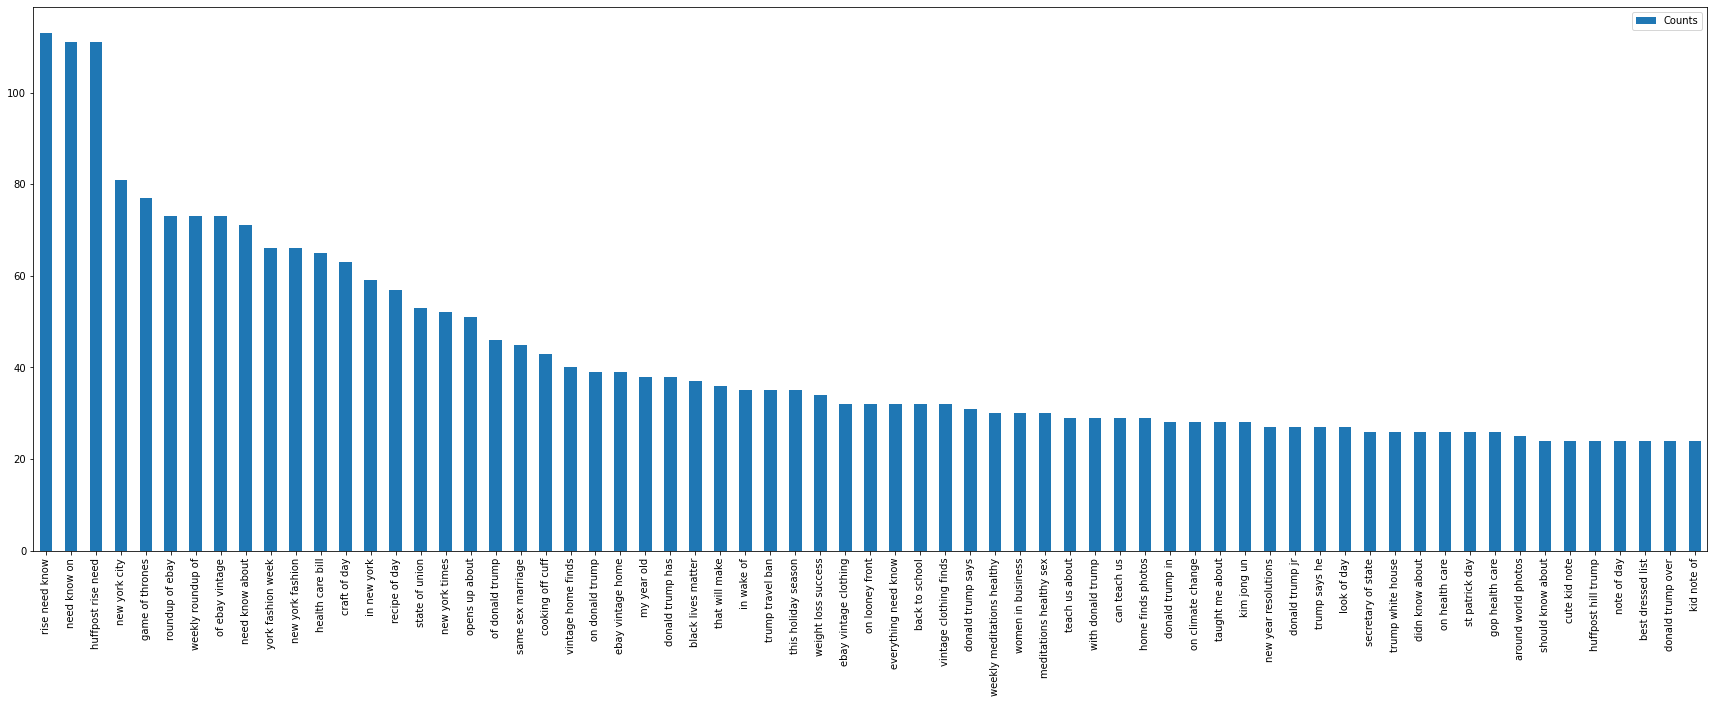

In [49]:
words_appearence_cut.plot(kind="bar", figsize=(30,10))

Usuńmy jeszcze te frazy z X_train_count

*Aktualnie nasze frazy są indeksami w words_appearence więc nie mamy się do nich jak łatwo odwołać, zresetujmy więc index*

In [50]:
words_appearence.reset_index(inplace=True)

Teraz możemy usunąć frazy z X_train_count

In [51]:
words_appearence_dropped = words_appearence[words_appearence.Counts < count_border]

In [52]:
X_train_count.drop(words_appearence_dropped['index'], axis=1, inplace=True)

In [53]:
X_train_count

,around world photos,back to school,best dressed list,black lives matter,can teach us,cooking off cuff,craft of day,cute kid note,didn know about,donald trump has,...,trump travel ban,trump white house,vintage clothing finds,vintage home finds,weekly meditations healthy,weekly roundup of,weight loss success,with donald trump,women in business,york fashion week
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1267,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1268,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1269,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1270,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
X_train_count.values

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

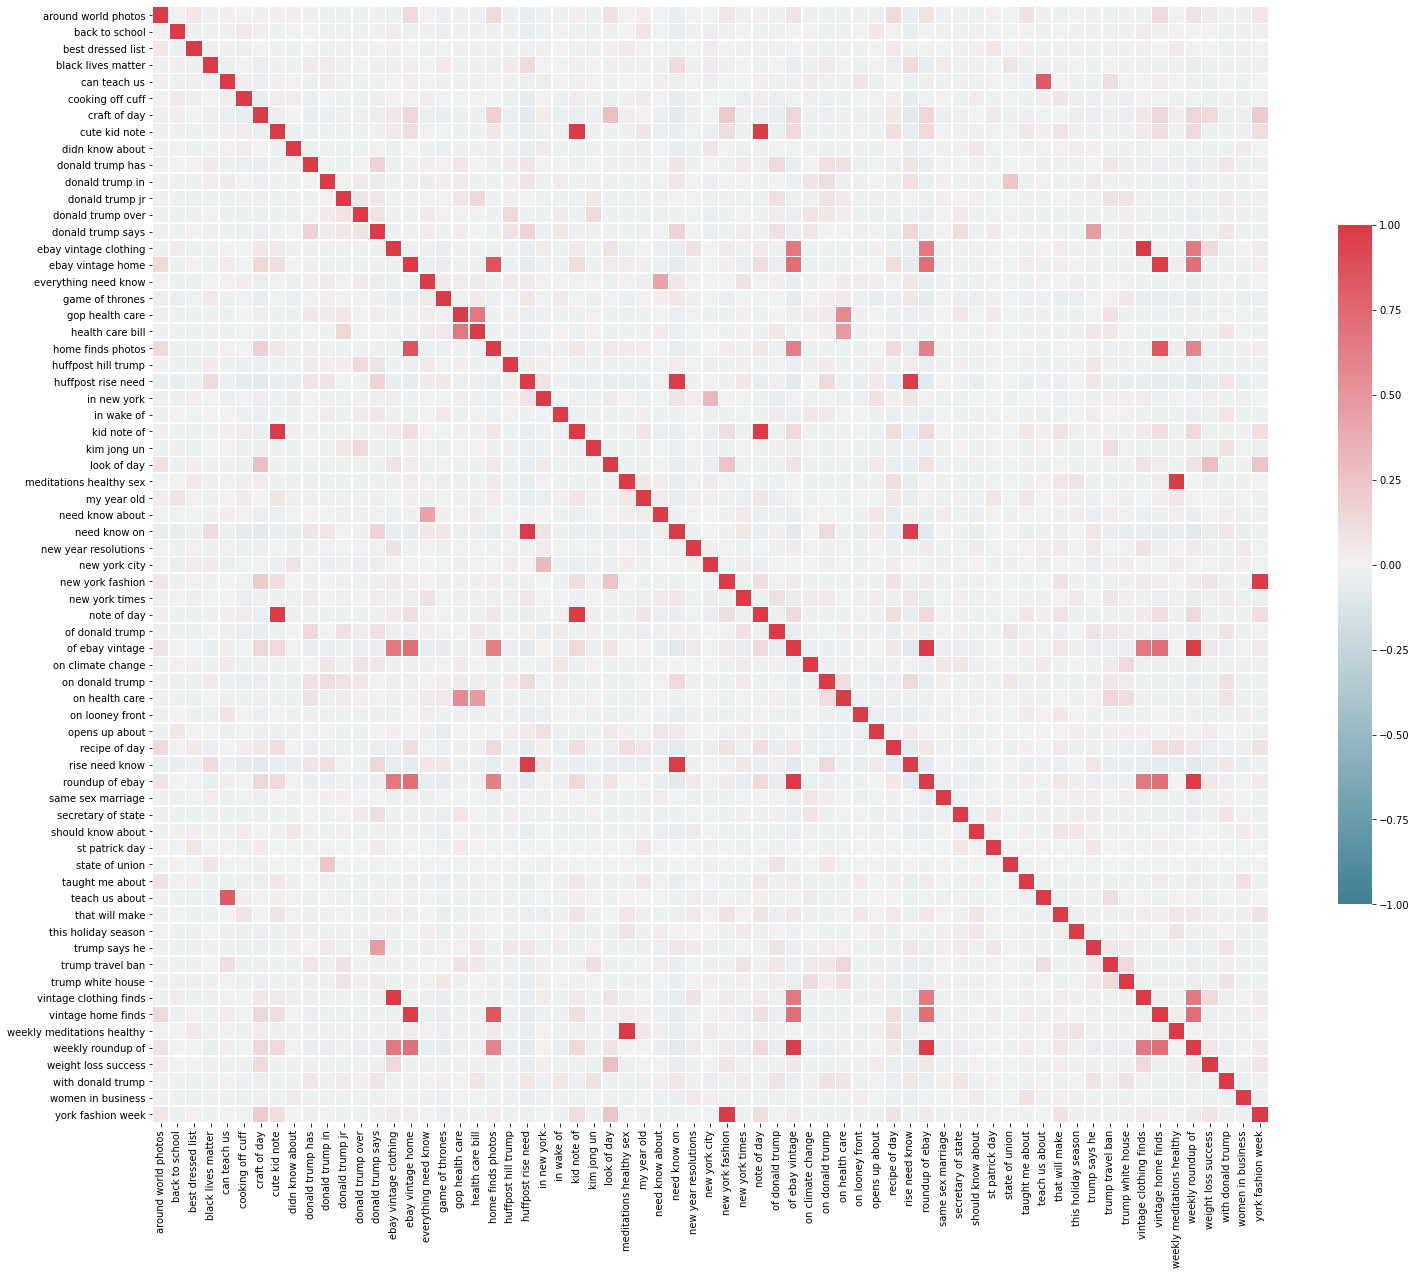

In [55]:
import seaborn as sns

# sns.set(style='darkgrid')

corr = X_train_count.corr()
f, ax = plt.subplots(figsize=(25, 25))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, cmap=cmap, vmin=-1, vmax=1,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={'shrink': .5}, ax=ax)
plt.show()

# Przygotowanie zbioru testowego

**Najpierw stwórzmy tablicę fraz**

In [56]:
testheadlines = []
for row in range(0,len(X_test.index)):
    testheadlines.append(' '.join(str(x) for x in X_test.iloc[row]))

In [57]:
test_words = countvectorizer.fit_transform(testheadlines)
print(test_words.shape)

(318, 138746)


In [58]:
X_test_count_all = test_words.toarray()

In [59]:
X_test_count_all = pd.DataFrame(data=X_test_count_all,columns = countvectorizer.get_feature_names())

In [60]:
X_test_count_all.head()

,000 000 listens,000 000 reasons,000 adoptions for,000 after losing,000 and guitar,000 at auction,000 balloons pops,000 bill for,000 brazilians curse,000 campaign to,...,zumba class news,zuniga should be,zurich 11 of,zurich mosque wounding,zwirner in london,zylowska top 15,zzs marriage beyond,zzs what sorcery,étienne behavioral science,čechomor is not
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
words_test = X_test_count_all.columns

In [62]:
words_test

Index(['000 000 listens', '000 000 reasons', '000 adoptions for',
       '000 after losing', '000 and guitar', '000 at auction',
       '000 balloons pops', '000 bill for', '000 brazilians curse',
       '000 campaign to',
       ...
       'zumba class news', 'zuniga should be', 'zurich 11 of',
       'zurich mosque wounding', 'zwirner in london', 'zylowska top 15',
       'zzs marriage beyond', 'zzs what sorcery', 'étienne behavioral science',
       'čechomor is not'],
      dtype='object', length=138746)

**Mamy już tablicę fraz oraz listę fraz**

Teraz musimy stworzyć X_test_count z takimi samymi kolumnami jak w X_train_count

In [63]:
X_test_count = pd.DataFrame(columns = X_train_count.columns)

In [64]:
X_test_count

,around world photos,back to school,best dressed list,black lives matter,can teach us,cooking off cuff,craft of day,cute kid note,didn know about,donald trump has,...,trump travel ban,trump white house,vintage clothing finds,vintage home finds,weekly meditations healthy,weekly roundup of,weight loss success,with donald trump,women in business,york fashion week


In [65]:
X_train_count.head(1)

,around world photos,back to school,best dressed list,black lives matter,can teach us,cooking off cuff,craft of day,cute kid note,didn know about,donald trump has,...,trump travel ban,trump white house,vintage clothing finds,vintage home finds,weekly meditations healthy,weekly roundup of,weight loss success,with donald trump,women in business,york fashion week
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Utworzyliśmy pusty dataframe X_test_count zawierający kolumny z X_train_count

Teraz musimy wpisać wystąpienia fraz do X_test_count, jeśli w testheadlines nie było takiej frazy jaka była w X_train_count to wtedy wpisujemy 0

In [66]:
1 if 'around world photos' in words_test else 0

0

In [67]:
X_test_count.columns

Index(['around world photos', 'back to school', 'best dressed list',
       'black lives matter', 'can teach us', 'cooking off cuff',
       'craft of day', 'cute kid note', 'didn know about', 'donald trump has',
       'donald trump in', 'donald trump jr', 'donald trump over',
       'donald trump says', 'ebay vintage clothing', 'ebay vintage home',
       'everything need know', 'game of thrones', 'gop health care',
       'health care bill', 'home finds photos', 'huffpost hill trump',
       'huffpost rise need', 'in new york', 'in wake of', 'kid note of',
       'kim jong un', 'look of day', 'meditations healthy sex', 'my year old',
       'need know about', 'need know on', 'new year resolutions',
       'new york city', 'new york fashion', 'new york times', 'note of day',
       'of donald trump', 'of ebay vintage', 'on climate change',
       'on donald trump', 'on health care', 'on looney front',
       'opens up about', 'recipe of day', 'rise need know', 'roundup of ebay',
    

In [68]:
for col in X_test_count.columns:
    X_test_count[col] = X_test_count_all[col] if col in words_test else 0

In [69]:
X_test_count['around world photos'] = 0 #z jakiegoś powodu to pomija i zostawia NaN

In [70]:
X_test_count

,around world photos,back to school,best dressed list,black lives matter,can teach us,cooking off cuff,craft of day,cute kid note,didn know about,donald trump has,...,trump travel ban,trump white house,vintage clothing finds,vintage home finds,weekly meditations healthy,weekly roundup of,weight loss success,with donald trump,women in business,york fashion week
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,2,0,0,1,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
314,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
315,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
316,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Policzmy ile jest kolumn w których są same 0 (tak z ciekawości)

In [71]:
only_zeros_columns = []
for col in X_test_count.columns:
    if X_test_count[col].value_counts().size == 1:
        only_zeros_columns.append(col)

In [72]:
len(only_zeros_columns)

15

# Modele

In [73]:
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

seed=123
kfold = StratifiedKFold(n_splits=5)

COLUMNS = X_train_count.columns

X_train_count = X_train_count.values
X_test_count = X_test_count.values

## DecisionTreeClassifier 

In [ ]:
from sklearn.tree import DecisionTreeClassifier

pipe = Pipeline([
    ('classifier', DecisionTreeClassifier())])
param_grid = {
            'classifier__criterion': ['gini', 'entropy', 'log_loss'],
            'classifier__splitter': ['best', 'random'],
            'classifier__min_samples_split':[1,2,4,10, 20, 50, 100],
            'classifier__min_samples_leaf':[1,2,4,10, 20, 50, 100]
}
grid_0 = GridSearchCV(pipe, param_grid, cv=kfold)
grid_0.fit(X_train_count, y_train)
# grid_0.best_params_

In [75]:
grid_0.best_params_

{'classifier__criterion': 'gini',
 'classifier__min_samples_leaf': 100,
 'classifier__min_samples_split': 2,
 'classifier__splitter': 'best'}

## SVM (linear)

In [76]:
pipe = Pipeline([
    ('classifier', SVC(kernel='linear'))])
param_grid = {
            'classifier__C': [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
}
grid_1 = GridSearchCV(pipe, param_grid, cv=kfold)
grid_1.fit(X_train_count, y_train)
# grid_1.best_params_

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('classifier', SVC(kernel='linear'))]),
             param_grid={'classifier__C': [1e-06, 1e-05, 0.0001, 0.001, 0.01,
                                           0.1, 1, 10, 100]})

In [77]:
grid_1.best_params_

{'classifier__C': 1e-06}

## LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
pipe = Pipeline([
    ('classifier', LogisticRegression(max_iter=10000))])

param_grid = {
            'classifier__C' : np.linspace(0, 0.1, 100),
            'classifier__solver':['newton-cg', 'lbfgs', 'liblinear'],
            'classifier__penalty' : ['l1', 'l2'],
            'classifier__tol':[1e-5, 1e-4, 1e-3],
            'classifier__fit_intercept':[False, True]
}

grid_2 = GridSearchCV(pipe, param_grid, cv=kfold,scoring='accuracy')
grid_2.fit(X_train_count, y_train)
# grid_2.best_params_

In [79]:
grid_2.best_params_

{'classifier__C': 0.03737373737373737,
 'classifier__fit_intercept': True,
 'classifier__penalty': 'l2',
 'classifier__solver': 'newton-cg',
 'classifier__tol': 1e-05}

## XGBClassifier 

In [80]:
import xgboost

xgb_cls = xgboost.XGBClassifier(n_estimators=10, verbosity = 0, use_label_encoder=False)

pipe = Pipeline([
    ('classifier', xgb_cls)])

param_grid = {
        'classifier__min_child_weight': [3,4,5],
        'classifier__gamma': [0, 1, 10],
        'classifier__subsample': [0.1, 0.3, 0.5],
        'classifier__lambda': [0.1, 1, 10, 100],
        'classifier__alpha': [0, 1, 10, 100],
        'classifier__max_depth': [3,6,9],
        'classifier__eta':[0.001, 0.01, 0.1, 0.3, 1],
}
# grid_3 = GridSearchCV(pipe, param_grid, cv=kfold, verbose=10, scoring='accuracy')
grid_3 = GridSearchCV(pipe, param_grid, cv=kfold, scoring='accuracy')
grid_3.fit(X_train_count, y_train)
grid_3.best_params_

{'classifier__alpha': 1,
 'classifier__eta': 0.001,
 'classifier__gamma': 0,
 'classifier__lambda': 10,
 'classifier__max_depth': 6,
 'classifier__min_child_weight': 5,
 'classifier__subsample': 0.5}

## RandomForestClassifier 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([
    ('classifier', RandomForestClassifier())])
param_grid = {
            'classifier__criterion': ['gini', 'entropy', 'log_loss'],
            'classifier__n_estimators': [10,100,400],
            'classifier__min_samples_split':[2,4,10, 20, 50, 100],
            'classifier__min_samples_leaf':[1,2,4,10, 20, 50, 100]
}
grid_4 = GridSearchCV(pipe, param_grid, cv=kfold)
grid_4.fit(X_train_count, y_train)
# grid_4.best_params_

In [82]:
grid_4.best_params_

{'classifier__criterion': 'entropy',
 'classifier__min_samples_leaf': 4,
 'classifier__min_samples_split': 20,
 'classifier__n_estimators': 100}

## MLPClassifier 

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(alpha=1e-5, max_iter=100,random_state=1)

pipe = Pipeline([
    ('classifier', mlp)])

param_grid = {
              'classifier__solver':['sgd', 'adam'],
#               'classifier__alpha': [0.0001, 0.001, 0.01, 0.1],
                'classifier__alpha': [0.001, 0.01, 0.1],
              'classifier__activation':['identity', 'logistic', 'relu'],
              'classifier__shuffle': [False, True],
              'classifier__early_stopping': [False, True],
              'classifier__hidden_layer_sizes':[(100,)],
              'classifier__learning_rate':['invscaling', 'adaptive'],
              'classifier__batch_size':[50, 100, 200, 300]
             }

grid_5 = GridSearchCV(pipe, param_grid, cv=kfold, scoring='accuracy')
# grid_5 = mlp
grid_5.fit(X_train_count, y_train)
# grid_5.best_params_

In [84]:
grid_5.best_params_

{'classifier__activation': 'logistic',
 'classifier__alpha': 0.1,
 'classifier__batch_size': 200,
 'classifier__early_stopping': True,
 'classifier__hidden_layer_sizes': (100,),
 'classifier__learning_rate': 'invscaling',
 'classifier__shuffle': True,
 'classifier__solver': 'adam'}

## GradientBoostingClassifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
pipe = Pipeline([
    ('classifier', GradientBoostingClassifier())])

param_grid = {
            'classifier__n_estimators': [1,10,30, 60],
            'classifier__learning_rate': [0.01, 0.1, 0.3, 0.6, 0.8, 1],
            'classifier__criterion': ['friedman_mse', 'squared_error'],
            'classifier__min_samples_split':[2,4,10, 20, 50, 100],
            'classifier__min_samples_leaf':[1,2,4,10, 20, 50, 100]
}

grid_6 = GridSearchCV(pipe, param_grid, cv=kfold, scoring='accuracy')
grid_6.fit(X_train_count, y_train)
grid_6.best_params_

In [86]:
grid_6.best_params_

{'classifier__criterion': 'friedman_mse',
 'classifier__learning_rate': 0.8,
 'classifier__min_samples_leaf': 2,
 'classifier__min_samples_split': 10,
 'classifier__n_estimators': 60}

## AdaBoostClassifier 

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
pipe = Pipeline([
    ('classifier', AdaBoostClassifier())])

param_grid = {
            'classifier__n_estimators': [1,10,30,40,50,60,70],
            'classifier__learning_rate': [0.001, 0.01, 0.1,0.3, 0.6, 0.8, 1,2,4,6, 10],
            'classifier__algorithm': ['SAMME', 'SAMME.R']
}

grid_7 = GridSearchCV(pipe, param_grid, cv=kfold, scoring='accuracy')
grid_7.fit(X_train_count, y_train)
# grid_7.best_params_

In [88]:
grid_7.best_params_

{'classifier__algorithm': 'SAMME',
 'classifier__learning_rate': 1,
 'classifier__n_estimators': 50}

## Keras bez early stopping 

In [89]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

from tensorflow.keras.callbacks import History

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout

keras.backend.clear_session()

history_1 = History()
keras_1 = Sequential()

keras_1.add(Flatten(input_shape=((X_train_count).shape[1],)))

keras_1.add(Dense(300))
keras_1.add(BatchNormalization())
keras_1.add(Activation("elu"))
keras_1.add(Dropout(0.3))

keras_1.add(Dense(150))
keras_1.add(BatchNormalization())
keras_1.add(Activation("elu"))
keras_1.add(Dropout(0.3))

keras_1.add(Dense(50))
keras_1.add(BatchNormalization())
keras_1.add(Activation("elu"))
keras_1.add(Dropout(0.3))

keras_1.add(Dense(1,activation="sigmoid"))

keras_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 67)                0         
_________________________________________________________________
dense (Dense)                (None, 300)               20400     
_________________________________________________________________
batch_normalization (BatchNo (None, 300)               1200      
_________________________________________________________________
activation (Activation)      (None, 300)               0         
_________________________________________________________________
dropout (Dropout)            (None, 300)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 150)               45150     
_________________________________________________________________
batch_normalization_1 (Batch (None, 150)               6

In [90]:
keras_1.compile(loss="binary_crossentropy",optimizer='adam', metrics=["accuracy"])

In [91]:
keras_1.fit(X_train_count, y_train,validation_data=(X_test_count, y_test), batch_size=32,epochs=200, callbacks=[history_1])

Epoch 1/200
40/40 [==============================] - 0s 8ms/step - loss: 0.8156 - accuracy: 0.5024 - val_loss: 0.6949 - val_accuracy: 0.5314
Epoch 2/200
40/40 [==============================] - 0s 3ms/step - loss: 0.7453 - accuracy: 0.5307 - val_loss: 0.6988 - val_accuracy: 0.5314
Epoch 3/200
40/40 [==============================] - 0s 3ms/step - loss: 0.7327 - accuracy: 0.5480 - val_loss: 0.6975 - val_accuracy: 0.5377
Epoch 4/200
40/40 [==============================] - 0s 3ms/step - loss: 0.7275 - accuracy: 0.5362 - val_loss: 0.7014 - val_accuracy: 0.5252
Epoch 5/200
40/40 [==============================] - 0s 3ms/step - loss: 0.7342 - accuracy: 0.5142 - val_loss: 0.7005 - val_accuracy: 0.5157
Epoch 6/200
40/40 [==============================] - 0s 3ms/step - loss: 0.7077 - accuracy: 0.5220 - val_loss: 0.7064 - val_accuracy: 0.5409
Epoch 7/200
40/40 [==============================] - 0s 3ms/step - loss: 0.7092 - accuracy: 0.5668 - val_loss: 0.7163 - val_accuracy: 0.5314
Epoch 8/200
4

Epoch 59/200
40/40 [==============================] - 0s 3ms/step - loss: 0.5882 - accuracy: 0.6619 - val_loss: 0.7658 - val_accuracy: 0.5189
Epoch 60/200
40/40 [==============================] - 0s 3ms/step - loss: 0.5888 - accuracy: 0.6604 - val_loss: 0.7725 - val_accuracy: 0.5283
Epoch 61/200
40/40 [==============================] - 0s 3ms/step - loss: 0.5792 - accuracy: 0.6722 - val_loss: 0.7768 - val_accuracy: 0.5189
Epoch 62/200
40/40 [==============================] - 0s 3ms/step - loss: 0.5904 - accuracy: 0.6627 - val_loss: 0.7850 - val_accuracy: 0.5094
Epoch 63/200
40/40 [==============================] - 0s 3ms/step - loss: 0.5704 - accuracy: 0.6714 - val_loss: 0.7971 - val_accuracy: 0.5063
Epoch 64/200
40/40 [==============================] - 0s 3ms/step - loss: 0.5735 - accuracy: 0.6824 - val_loss: 0.7868 - val_accuracy: 0.5283
Epoch 65/200
40/40 [==============================] - 0s 3ms/step - loss: 0.5834 - accuracy: 0.6572 - val_loss: 0.7735 - val_accuracy: 0.5189
Epoch 

40/40 [==============================] - 0s 3ms/step - loss: 0.5175 - accuracy: 0.7020 - val_loss: 0.9025 - val_accuracy: 0.5126
Epoch 174/200
40/40 [==============================] - 0s 3ms/step - loss: 0.5101 - accuracy: 0.7241 - val_loss: 0.9010 - val_accuracy: 0.5314
Epoch 175/200
40/40 [==============================] - 0s 3ms/step - loss: 0.5307 - accuracy: 0.6855 - val_loss: 0.8547 - val_accuracy: 0.5189
Epoch 176/200
40/40 [==============================] - 0s 3ms/step - loss: 0.5265 - accuracy: 0.6997 - val_loss: 0.8889 - val_accuracy: 0.5283
Epoch 177/200
40/40 [==============================] - 0s 3ms/step - loss: 0.4991 - accuracy: 0.7099 - val_loss: 0.8930 - val_accuracy: 0.5126
Epoch 178/200
40/40 [==============================] - 0s 3ms/step - loss: 0.5149 - accuracy: 0.6973 - val_loss: 0.8899 - val_accuracy: 0.5314
Epoch 179/200
40/40 [==============================] - 0s 3ms/step - loss: 0.5042 - accuracy: 0.7186 - val_loss: 0.8898 - val_accuracy: 0.5126
Epoch 180/200

## Keras z early stopping

In [92]:
keras.backend.clear_session()

history_2 = History()
keras_2 = Sequential()

keras_2.add(Flatten(input_shape=((X_train_count).shape[1],)))

keras_2.add(Dense(300))
keras_2.add(BatchNormalization())
keras_2.add(Activation("elu"))
keras_2.add(Dropout(0.3))

keras_2.add(Dense(150))
keras_2.add(BatchNormalization())
keras_2.add(Activation("elu"))
keras_2.add(Dropout(0.3))

keras_2.add(Dense(50))
keras_2.add(BatchNormalization())
keras_2.add(Activation("elu"))
keras_2.add(Dropout(0.3))

keras_2.add(Dense(1,activation="sigmoid"))

keras_2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 67)                0         
_________________________________________________________________
dense (Dense)                (None, 300)               20400     
_________________________________________________________________
batch_normalization (BatchNo (None, 300)               1200      
_________________________________________________________________
activation (Activation)      (None, 300)               0         
_________________________________________________________________
dropout (Dropout)            (None, 300)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 150)               45150     
_________________________________________________________________
batch_normalization_1 (Batch (None, 150)               6

In [93]:
keras_2.compile(loss="binary_crossentropy",optimizer='adam', metrics=["accuracy"])

In [94]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, mode='max', verbose=1)

In [95]:
keras_2.fit(X_train_count, y_train,validation_data=(X_test_count, y_test), batch_size=32,epochs=200, callbacks=[history_2,early_stopping])

Epoch 1/200
40/40 [==============================] - 0s 7ms/step - loss: 0.8501 - accuracy: 0.4898 - val_loss: 0.6909 - val_accuracy: 0.5566
Epoch 2/200
40/40 [==============================] - 0s 3ms/step - loss: 0.7598 - accuracy: 0.5173 - val_loss: 0.6979 - val_accuracy: 0.5346
Epoch 3/200
40/40 [==============================] - 0s 3ms/step - loss: 0.7334 - accuracy: 0.5299 - val_loss: 0.6973 - val_accuracy: 0.5252
Epoch 4/200
40/40 [==============================] - 0s 3ms/step - loss: 0.7182 - accuracy: 0.5425 - val_loss: 0.7005 - val_accuracy: 0.5440
Epoch 5/200
40/40 [==============================] - 0s 3ms/step - loss: 0.7106 - accuracy: 0.5377 - val_loss: 0.7070 - val_accuracy: 0.5346
Epoch 6/200
40/40 [==============================] - 0s 3ms/step - loss: 0.7021 - accuracy: 0.5723 - val_loss: 0.7049 - val_accuracy: 0.5346
Epoch 7/200
40/40 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5778 - val_loss: 0.7118 - val_accuracy: 0.5314
Epoch 8/200
4

# Wyniki

Po kolei sprawdzamy accuracy dla każdego modelu oraz dodajemy niekiedy dodatkowe rzeczy w postaci np. wykresów.

**Na samym dole w tabelce zebraliśmy wszystkie wyniki razem**

In [96]:
from sklearn import  metrics

In [97]:
#DecisionTreeClassifier
print("accuracy_score: {}".format( metrics.accuracy_score(y_test, grid_0.predict(X_test_count)) ))

accuracy_score: 0.5408805031446541


Generowanie drzewa (wizualizacja)

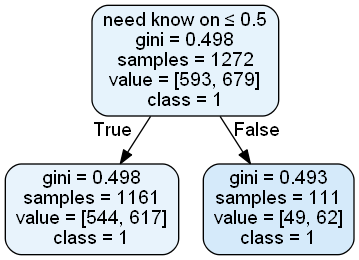

In [98]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

model = grid_0.best_estimator_.named_steps['classifier']
dot_data = StringIO()
export_graphviz(
    model,
    out_file=dot_data,
    filled=True,
    rounded=True,
    special_characters=True,
    feature_names=COLUMNS,
    class_names=['0', '1']
)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree.png')
Image(graph.create_png())

In [99]:
#SVM
print("accuracy_score: {}".format( metrics.accuracy_score(y_test, grid_1.predict(X_test_count)) ))

accuracy_score: 0.5408805031446541


In [100]:
#Logistic regression
print("accuracy_score: {}".format( metrics.accuracy_score(y_test, grid_2.predict(X_test_count)) ))

accuracy_score: 0.5314465408805031


In [101]:
#XGBoost
print("accuracy_score: {}".format( metrics.accuracy_score(y_test, grid_3.predict(X_test_count)) ))

accuracy_score: 0.5471698113207547


In [102]:
#RandomForestClassifier
print("accuracy_score: {}".format( metrics.accuracy_score(y_test, grid_4.predict(X_test_count)) ))

accuracy_score: 0.5283018867924528


In [103]:
#MLP
print("accuracy_score: {}".format( metrics.accuracy_score(y_test, grid_5.predict(X_test_count)) ))

accuracy_score: 0.5345911949685535


In [104]:
#GradientBoostingClassifeir
print("accuracy_score: {}".format( metrics.accuracy_score(y_test, grid_6.predict(X_test_count)) ))

accuracy_score: 0.5062893081761006


In [105]:
#AdaBoostingClassifeir
print("accuracy_score: {}".format( metrics.accuracy_score(y_test, grid_7.predict(X_test_count)) ))

accuracy_score: 0.5314465408805031


In [106]:
#Keras bez early stopping
print("accuracy_score: {}".format( metrics.accuracy_score(y_test, keras_1.predict_classes(X_test_count)) ))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
accuracy_score: 0.5062893081761006


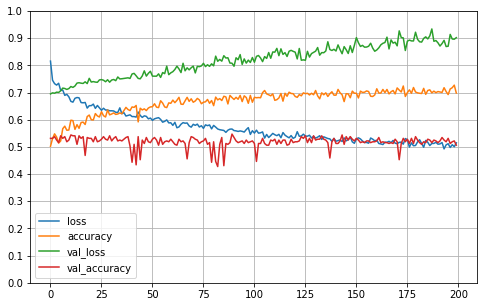

In [107]:
import pandas as pd

pd.DataFrame(history_1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.yticks(np.linspace(0,1,11))
plt.show()

In [108]:
#Keras z early stopping
print("accuracy_score: {}".format( metrics.accuracy_score(y_test, keras_2.predict_classes(X_test_count)) ))

accuracy_score: 0.5188679245283019


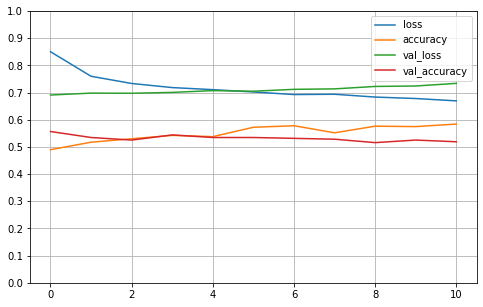

In [109]:
pd.DataFrame(history_2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.yticks(np.linspace(0,1,11))
plt.show()

## Zwizualizujmy wyniki w tabelce 

Instructions for updating:
Please use `model.predict()` instead.


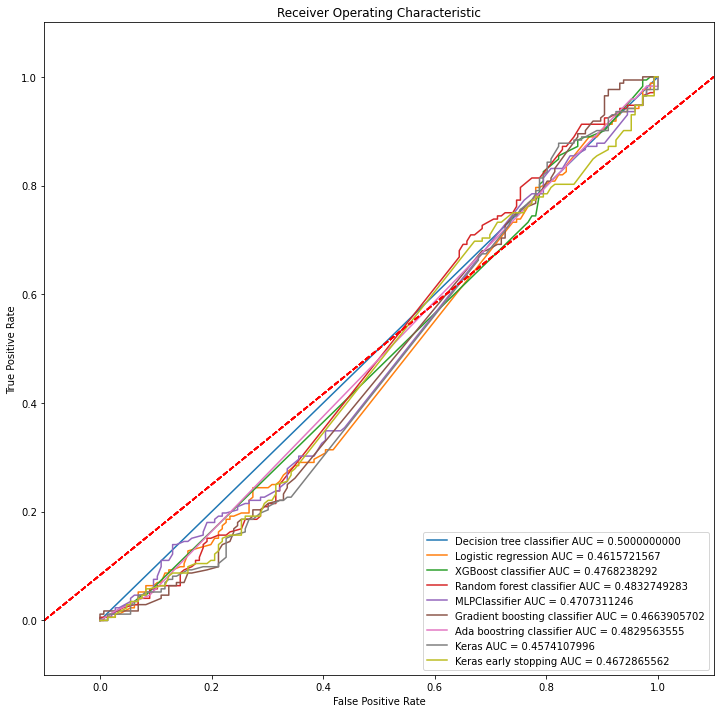

In [114]:
models = []
models.append(('Decision tree classifier', grid_0))
models.append(('SVM linear', grid_1))
models.append(('Logistic regression', grid_2))
models.append(('XGBoost classifier', grid_3))
models.append(('Random forest classifier', grid_4))
models.append(('MLPClassifier', grid_5))
models.append(('Gradient boosting classifier', grid_6))
models.append(('Ada boostring classifier', grid_7))
models.append(('Keras', keras_1))
models.append(('Keras early stopping', keras_2))

precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
roc_auc_val = []
plt.figure(figsize=(12, 12))
for name, model in models:
    if((name == 'Keras') or (name == 'Keras early stopping')):
        precision_score.append(metrics.precision_score(y_test, model.predict_classes(X_test_count)))
        recall_score.append(metrics.recall_score(y_test, model.predict_classes(X_test_count)))
        f1_score.append( metrics.f1_score(y_test, model.predict_classes(X_test_count)))
        accuracy_score.append(metrics.accuracy_score(y_test, model.predict_classes(X_test_count)))
        
        
        # calculate the fpr and tpr for all thresholds of the classification
        probs = model.predict_proba(X_test_count)
        preds = probs
        fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
        roc_auc = metrics.auc(fpr, tpr)
        roc_auc_val.append(roc_auc)
        
    else:
        precision_score.append(metrics.precision_score(y_test, model.predict(X_test_count)))
        recall_score.append(metrics.recall_score(y_test, model.predict(X_test_count)))
        f1_score.append( metrics.f1_score(y_test, model.predict(X_test_count)))
        accuracy_score.append(metrics.accuracy_score(y_test, model.predict(X_test_count)))
        
        if (name != 'SVM linear'):
            # calculate the fpr and tpr for all thresholds of the classification
            probs = model.predict_proba(X_test_count)
            preds = probs[:,1]
            fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
            roc_auc = metrics.auc(fpr, tpr)
            roc_auc_val.append(roc_auc)
            
            
    if (name != 'SVM linear'):
        # method I: plt
        import matplotlib.pyplot as plt
        plt.title('Receiver Operating Characteristic')
        plt.plot(fpr, tpr, label = '%s AUC = %0.10f' % (name, roc_auc))
        plt.legend(loc = 'lower right')
        plt.plot([-0.1, 1.1], [0, 1],'r--')
        plt.xlim([-0.1, 1.1])
        plt.ylim([-0.1, 1.1])
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
plt.rcParams['figure.figsize'] = [2, 2]
plt.show()

In [115]:
d = {
     'precision_score': precision_score, 
     'recall_score': recall_score, 
     'f1_score': f1_score,
     'accuracy_score' : accuracy_score,
#      'roc_auc': roc_auc_val
    }
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=[model[0] for model in models])
df.sort_values(by='accuracy_score', ascending=False)

,Method,precision_score,recall_score,f1_score,accuracy_score
3,XGBoost classifier,0.544586,0.994186,0.703704,0.547170
0,Decision tree classifier,0.540881,1.000000,0.702041,0.540881
1,SVM linear,0.540881,1.000000,0.702041,0.540881
5,MLPClassifier,0.538710,0.970930,0.692946,0.534591
2,Logistic regression,0.538462,0.936047,0.683652,0.531447
7,Ada boostring classifier,0.536508,0.982558,0.694045,0.531447
4,Random forest classifier,0.546610,0.750000,0.632353,0.528302
9,Keras early stopping,0.539749,0.750000,0.627737,0.518868
6,Gradient boosting classifier,0.533040,0.703488,0.606516,0.506289
8,Keras,0.534562,0.674419,0.596401,0.506289


In [116]:
data['Increased'].value_counts()

1    851
0    739
Name: Increased, dtype: int64

In [118]:
851/(851+739)

0.5352201257861635